In [1]:
import torch
import torch.nn as nn
import numpy as np
from PIL import Image #
from torchvision import transforms
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader, TensorDataset
from torchvision.utils import save_image
import matplotlib.pyplot as plt

In [2]:
torch.manual_seed(777)
IMAGE_SIZE=128

device='cuda' if torch.cuda.is_available() else 'cpu'
if device=='cuda':
    torch.cuda.manual_seed_all(777)

In [3]:
original_datasets=ImageFolder(root='mosquito_image/',
                              transform=transforms.Compose([
                                  transforms.Resize((IMAGE_SIZE, IMAGE_SIZE)),
                                  transforms.ToTensor()
                              ]))

In [4]:
print(original_datasets)

Dataset ImageFolder
    Number of datapoints: 120
    Root location: mosquito_image/
    StandardTransform
Transform: Compose(
               Resize(size=(128, 128), interpolation=bilinear, max_size=None, antialias=True)
               ToTensor()
           )


In [5]:
original_loader=DataLoader(original_datasets,
                           batch_size=120,
                           shuffle=True,
                           drop_last=False,
                           num_workers=1) # 데이터 로시드 사용할 병렬 프로세스 수, 단일 프로세스 사용

In [6]:
for X, Y in original_loader:
    print(X.size(), Y.size()) 
    print(Y) # Y는 라벨링된 값
    break

torch.Size([120, 3, 128, 128]) torch.Size([120])
tensor([1, 2, 0, 2, 2, 1, 1, 2, 2, 2, 2, 2, 0, 0, 2, 0, 1, 1, 2, 0, 2, 2, 1, 2,
        0, 1, 2, 0, 2, 2, 0, 2, 0, 2, 2, 1, 1, 2, 0, 2, 2, 2, 0, 2, 2, 2, 2, 0,
        0, 1, 2, 0, 1, 0, 2, 2, 2, 0, 2, 0, 1, 2, 2, 0, 2, 0, 1, 2, 2, 0, 2, 2,
        2, 0, 2, 0, 2, 2, 0, 2, 1, 2, 2, 2, 1, 0, 2, 0, 2, 1, 2, 1, 0, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0, 1, 2, 0, 1, 0, 2, 0, 2, 0, 1, 0, 0, 2])


In [7]:
# 이미지 로더로 부터 이미지와 label을 추출
#total_batch=len(original_loader)
#print(total_batch)
#for i in range(total_batch):
original_images, labels=next(iter(original_loader)) 
#loader로부터 원래의 이미지로부터 새로운 이미지와 레이블 추출
print(original_images.shape)
print(labels.shape)

torch.Size([120, 3, 128, 128])
torch.Size([120])


In [9]:
print(labels[:10])

tensor([2, 1, 0, 2, 2, 2, 1, 0, 0, 2])


In [10]:
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'
#import matplotlib.pyplot as plt

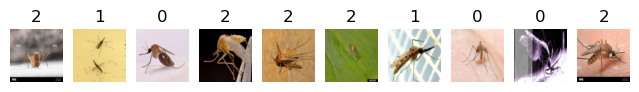

In [11]:
plt.figure(figsize=(8,2))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.title(labels[i].item())
    plt.imshow(original_images[i].permute(1,2,0))
    plt.axis('off')
plt.show()

In [12]:
X1=original_images #3,128,128 : 채널, 행, 열
Y1=labels
print(X1.size(), Y1.size())

torch.Size([120, 3, 128, 128]) torch.Size([120])


In [13]:
Image_transform=transforms.Compose([
    transforms.Resize((256,256)),
    transforms.CenterCrop((IMAGE_SIZE, IMAGE_SIZE)),
    transforms.ToTensor()
])

In [15]:
transforms_datasets=ImageFolder(root='mosquito_image/',
                                transform=Image_transform)
transforms_loader=DataLoader(transforms_datasets,
                             batch_size=60, 
                             shuffle=True,
                             num_workers=1)

In [16]:
transforms_images, transforms_labels=next(iter(transforms_loader))

In [17]:
print(transforms_images.size(), transforms_labels.size())
X2=torch.cat([X1, transforms_images], dim=0)
Y2=torch.cat([Y1, transforms_labels],dim=0)
print(X2.size(), Y2.size())

torch.Size([60, 3, 128, 128]) torch.Size([60])
torch.Size([180, 3, 128, 128]) torch.Size([180])


In [19]:
none_datasets=ImageFolder(root='mosquito_image/',
                                transform=transforms.Compose([
                                  transforms.Resize((IMAGE_SIZE, IMAGE_SIZE)),
                                  transforms.ToTensor()
                                  ]))
none_loader=DataLoader(none_datasets,
                             batch_size=60, 
                             shuffle=False,
                             num_workers=1)

In [20]:
none_images, none_labels=next(iter(none_loader)) #none_images는 원본 이미지

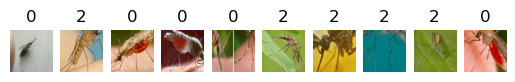

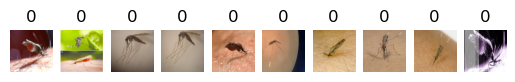

In [21]:
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.title(transforms_labels[i].item())
    plt.imshow(transforms_images[i].permute(1,2,0))
    plt.axis('off')
plt.show()

for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.title(none_labels[i].item())
    plt.imshow(none_images[i].permute(1,2,0))
    plt.axis('off')
plt.show()

In [22]:
def create_loader(transform):
    transforms_datasets=ImageFolder(root='mosquito_image',
                                    transform=transform)
    transform_loader=DataLoader(transforms_datasets,
                                batch_size=60,
                                shuffle=True,
                                num_workers=1)
    
    transform_images, labels=next(iter(transform_loader))
    return transform_images, labels

In [23]:
Image_transform=transforms.Compose([
    transforms.Resize((IMAGE_SIZE, IMAGE_SIZE)),
    transforms.ColorJitter(brightness=(0.7,0.9),
                           contrast=(1,1),
                           saturation=(0.7,0.9),
                           #hue=(-0.2,0.2)
                        ),
    transforms.ToTensor()                          
])
color_tf_images, color_tf_labels=create_loader(Image_transform)

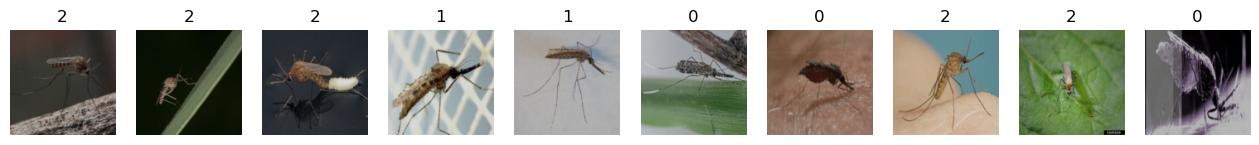

In [24]:
plt.figure(figsize=(16,4))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.title(color_tf_labels[i].item())
    plt.imshow(color_tf_images[i].permute(1,2,0))
    plt.axis('off')
plt.show()

In [25]:
X3=torch.cat([X2, color_tf_images], dim=0)
Y3=torch.cat([Y2, color_tf_labels], dim=0)
print(X3.size(), Y3.size())

torch.Size([240, 3, 128, 128]) torch.Size([240])


In [26]:
image_transform = transforms.Compose([
    transforms.Resize((IMAGE_SIZE, IMAGE_SIZE)),
    # RandomHorizontalFlip 적용
    transforms.RandomHorizontalFlip(p=0.8),  # 수평 뒤집기
    transforms.ToTensor()
])
flip_tf_images, flip_tf_labels=create_loader(image_transform)
X4=torch.cat([X3, flip_tf_images], dim=0)
Y4=torch.cat([Y3, flip_tf_labels],dim=0)
print(X4.size(), Y4.size())

torch.Size([300, 3, 128, 128]) torch.Size([300])


In [27]:
image_transform = transforms.Compose([
    transforms.Resize((IMAGE_SIZE, IMAGE_SIZE)),
    # RandomRotation 적용
    transforms.RandomRotation(degrees=(-15, 15),
        interpolation=transforms.InterpolationMode.BILINEAR, fill=0),
    transforms.ToTensor()
])

rot_tf_images, rot_tf_labels=create_loader(image_transform)
X5=torch.cat([X4, rot_tf_images], dim=0)
Y5=torch.cat([Y4, rot_tf_labels], dim=0)
print(X5.size(), Y5.size())

torch.Size([360, 3, 128, 128]) torch.Size([360])


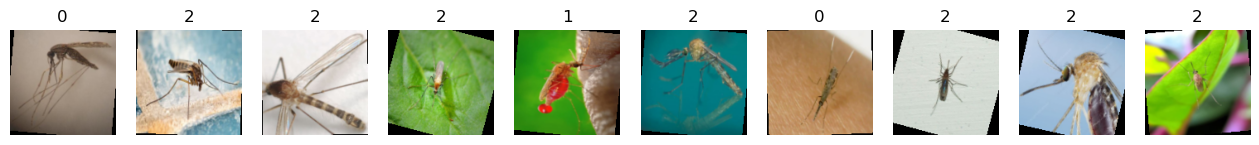

In [28]:
plt.figure(figsize=(16,4))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.title(rot_tf_labels[i].item())
    plt.imshow(rot_tf_images[i].permute(1,2,0))
    plt.axis('off')
plt.show()

In [30]:
cnt0=(Y5==0).sum() 
cnt1=(Y5==1).sum()
cnt2=(Y5==2).sum()

print(cnt0, cnt1, cnt2)

tensor(103) tensor(57) tensor(200)


In [31]:
X=X5
Y=Y5
ratios=[0.8,0.2]
print(Y.size())
train_cnt=int(Y.size(0)*ratios[0])
test_cnt=int(Y.size(0)*ratios[1])
cnts=[train_cnt, test_cnt]
print(train_cnt, test_cnt)

torch.Size([360])
288 72


In [32]:
indices=torch.randperm(X.size(0))
print(indices[:10])

tensor([ 33, 132,  79, 256, 114,  13,  26, 180,  47,  43])


In [33]:
x=torch.index_select(X, dim=0, index=indices)
y=torch.index_select(Y, dim=0, index=indices)
x_train=x[:cnts[0]]
x_test=x[cnts[0]:]
y_train=y[:cnts[0]]
y_test=y[cnts[0]:]

print(x_train.size(), y_train.size())
print(x_test.size(), y_test.size())

torch.Size([288, 3, 128, 128]) torch.Size([288])
torch.Size([72, 3, 128, 128]) torch.Size([72])


In [34]:
train_dataset=TensorDataset(x_train, y_train)
test_dataset=TensorDataset(x_test, y_test)

In [35]:
train_loader=DataLoader(train_dataset,
                        batch_size=60,
                        shuffle=True,
                        drop_last=False)
test_loader=DataLoader(test_dataset)

In [36]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN,self).__init__()

        # 입력(3, 128, 128)
        self.conv1=nn.Conv2d( #3, 128,128
            in_channels=3,
            out_channels=8,
            kernel_size=3,
            stride=1,
            padding=1
        )
        self.conv2=nn.Conv2d( #8, 64,64
            in_channels=8,
            out_channels=16,
            kernel_size=3,
            stride=1,
            padding=1
        )
        self.conv3=nn.Conv2d( #16, 32,32
            in_channels=16,
            out_channels=32,
            kernel_size=3,
            stride=1,
            padding=1
        )
        self.conv4=nn.Conv2d( #32, 16,16
            in_channels=32,
            out_channels=64,
            kernel_size=3,
            stride=1,
            padding=1
        )
        self.conv5=nn.Conv2d( #64, 8,8
            in_channels=64,
            out_channels=128,
            kernel_size=3,
            stride=1,
            padding=1
        )
        self.pool=nn.MaxPool2d(kernel_size=2,stride=2)
        self.fc1=nn.Linear(128*4*4, 128)
        self.fc2=nn.Linear(128,64)
        self.fc3=nn.Linear(64,5)
    
    def forward(self, x): #(3,128,128)
        x=self.conv1(x)
        x=torch.relu(x)
        x=self.pool(x) #(8,64,64)
        x=self.conv2(x)
        x=torch.relu(x)
        x=self.pool(x) #(16,32,32)
        x=self.conv3(x)
        x=torch.relu(x)
        x=self.pool(x) #(32,16,16)
        x=self.conv4(x)
        x=torch.relu(x)
        x=self.pool(x) #(64,8,8)
        x=self.conv5(x)
        x=torch.relu(x)
        x=self.pool(x) #(128,4,4)

        x=x.view(-1, 4*4*128)
        x=self.fc1(x)
        x=self.fc2(x)
        x=self.fc3(x)
        x=torch.softmax(x, dim=1)
        return x

In [37]:
model =CNN().to(device)
print(model)
optimizer=torch.optim.Adam(model.parameters(),lr=0.001)
criterion=nn.CrossEntropyLoss()

CNN(
  (conv1): Conv2d(3, 8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(8, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv4): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=2048, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=5, bias=True)
)


In [38]:
def train(model, train_loader, optimizer, interval):
    model.train() #모델의 훈련 mode로 설정

    for batch_index,(image, label) in enumerate(train_loader):
        image=image.to(device)
        label=label.to(device)

        optimizer.zero_grad()
        y_hat=model(image)
        loss=criterion(y_hat, label)
        loss.backward()
        optimizer.step()

        if batch_index % interval==0:
            print('train Epoch:{}, Train Loss:{}'.format(epoch, loss.item()))

In [39]:
def evaluate(model, test_loader):
    model.eval() #모데을 평가모드로 설정
    test_loss=0
    correct=0
    
    with torch.no_grad():
        for image, label in test_loader:
            image=image.to(device)
            label=label.to(device)
            y_hat=model(image)
            test_loss+=criterion(y_hat, label).item()
            predition=y_hat.argmax(dim=1)
            correct+=(predition==label).sum()
    
    test_loss=test_loss/len(test_loader.dataset)
    test_accuracy=correct/len(test_loader.dataset)*60
    return test_loss, test_accuracy

In [41]:
epochs=200
for epoch in range(1, epochs+1):
    train(model, train_loader, optimizer, interval=100)
    test_loss, test_accuracy=evaluate(model, test_loader)
    print('epoch:{}, test loss:{}, test accuracy:{}'
          .format(epoch, test_loss, test_accuracy))

train Epoch:1, Train Loss:1.3381658792495728
epoch:1, test loss:1.2937213712268405, test accuracy:36.66666793823242
train Epoch:2, Train Loss:1.3548325300216675
epoch:2, test loss:1.2937213712268405, test accuracy:36.66666793823242
train Epoch:3, Train Loss:1.3881659507751465
epoch:3, test loss:1.2937213712268405, test accuracy:36.66666793823242
train Epoch:4, Train Loss:1.388165831565857
epoch:4, test loss:1.2937213712268405, test accuracy:36.66666793823242
train Epoch:5, Train Loss:1.3714993000030518
epoch:5, test loss:1.2937213712268405, test accuracy:36.66666793823242
train Epoch:6, Train Loss:1.3714991807937622
epoch:6, test loss:1.2937213712268405, test accuracy:36.66666793823242
train Epoch:7, Train Loss:1.4214993715286255
epoch:7, test loss:1.2937213712268405, test accuracy:36.66666793823242
train Epoch:8, Train Loss:1.3381659984588623
epoch:8, test loss:1.2937213712268405, test accuracy:36.66666793823242
train Epoch:9, Train Loss:1.4548325538635254
epoch:9, test loss:1.2937213

In [43]:
path='model.pt'
torch.save(model.state_dict(), path)

In [44]:
model2=CNN().to(device)
model2.load_state_dict(torch.load(path))
model2.eval()


C:\Users\it\AppData\Local\Temp\ipykernel_16032\2502779911.py:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model2.load_state_dict(torch.load(path))


CNN(
  (conv1): Conv2d(3, 8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(8, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv4): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=2048, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=5, bias=True)
)

In [45]:
predict=model2(x_test[1].to(device)).argmax(dim=1)
print(predict.item(), y_test[1].item())

2 2


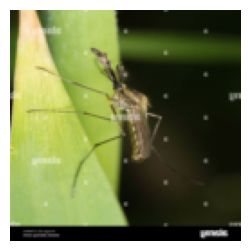

In [46]:
plt.figure(figsize=(3, 3))
# permute로 이미지의 shape를 다음과 같이 변경합니다
# (height, width, channel)
plt.imshow(x_test[1].permute(1, 2, 0))
plt.axis('off')
plt.show()